In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-score/Book_2.csv
/kaggle/input/compas/compas-scores-two-years.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/compas/compas-scores-two-years.csv')

In [3]:
df.info()
import warnings

# ignore all warnings
warnings.filterwarnings('ignore')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [4]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [5]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd

# Filter data to only include African-American individuals with a two-year recidivism score of 1
filtered_df = df[(df.race == 'Native American') & (df.two_year_recid == 1)]



# Group data by age
grouped_df = filtered_df.groupby('age')

# Compute unique count of individuals in each age group
unique_counts = grouped_df.id.nunique()

# Create Plotly bar graph
data = [go.Bar(x=unique_counts.index, y=unique_counts.values)]

layout = go.Layout(title='Unique Count of Native American Individuals with a Two-Year Recidivism Score of 1', xaxis_title='Age', yaxis_title='Count')

fig = go.Figure(data=data, layout=layout)

# Display graph in notebook
pyo.iplot(fig)



In [6]:




# Filter data to only include African-American individuals with a two-year recidivism score of 1
filtered_df = df[(df.race == 'African-American') & (df.two_year_recid == 1)]



# Group data by age
grouped_df = filtered_df.groupby('age')

# Compute unique count of individuals in each age group
unique_counts = grouped_df.id.nunique()

# Create Plotly bar graph
data = [go.Bar(x=unique_counts.index, y=unique_counts.values)]

layout = go.Layout(title='Unique Count of African-American Individuals with a Two-Year Recidivism Score of 1', xaxis_title='Age', yaxis_title='Count')

fig = go.Figure(data=data, layout=layout)

# Display graph in notebook
pyo.iplot(fig)


# # Decile Score As high for Native American and African-American

In [7]:
# Filter data to only include Native American and African-American individuals with a two-year recidivism score of 1
filtered_df = df[(df['race'] == 'Native American') | (df['race'] == 'African-American')]
filtered_df = filtered_df[filtered_df['v_score_text'] == 'High']

# Group data by race and age
grouped_df = filtered_df.groupby(['race', 'age'])

# Compute count of individuals in each group
counts = grouped_df.size()

# Create Plotly bar graph
data = []

for race in ['Native American', 'African-American']:
    data.append(go.Bar(x=counts[race].index, y=counts[race].values, name=race))

layout = go.Layout(title='Count of Individuals with with Decile score text as high grouped by Race and Age', xaxis_title='Age', yaxis_title='Count')

fig = go.Figure(data=data, layout=layout)

# Display graph in notebook
pyo.iplot(fig)

As compare to  white, recidivism with in two year is way higer in black people.

In [8]:
df.race.unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

In [9]:


counts = df.groupby(['race', 'v_decile_score']).size()

# Check if any race has a disproportionate number of two-year recidivisms
for race in df['race'].unique():
    try:
        if counts[race, 4] / counts[race, 1] > 1.1:
            print(f"{race} has a disproportionate number of two-year recidivisms")
    except KeyError:
        # Handle the case where a race does not have any two-year recidivisms
        pass

Native American has a disproportionate number of two-year recidivisms


In [10]:
bins = {"Low": 1, "Medium": 2, "High": 3}
df["v_score_text_binned"] = df["v_score_text"].map(bins)

# Print the first 10 rows of the new DataFrame
print(df[["v_score_text", "v_score_text_binned"]].head(10))

  v_score_text  v_score_text_binned
0          Low                    1
1          Low                    1
2          Low                    1
3       Medium                    2
4          Low                    1
5          Low                    1
6          Low                    1
7          Low                    1
8          Low                    1
9       Medium                    2


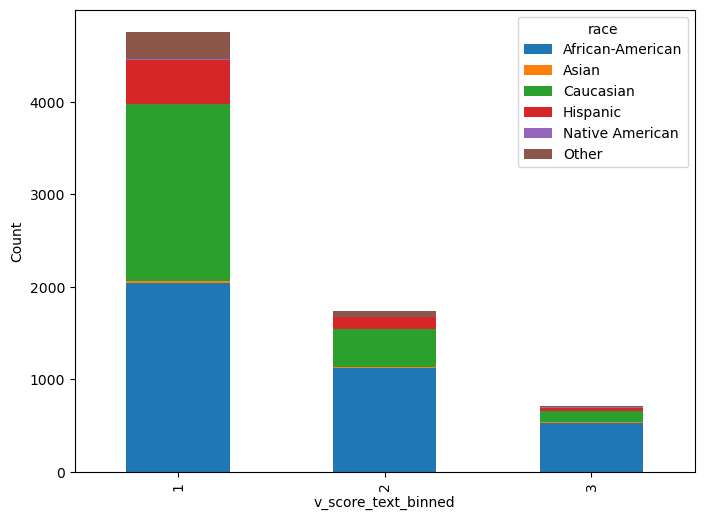

In [11]:
# Group the data by v_score_text_binned and race
import matplotlib.pyplot as plt

# Create the grouped data
grouped = df.groupby(["v_score_text_binned", "race"]).size().unstack()

# Plot the data
ax = grouped.plot(kind="bar", stacked=True, figsize=(8,6))
ax.set_xlabel("v_score_text_binned")
ax.set_ylabel("Count")
plt.show()


In [12]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of rows with Native American and African American
native_american_count = len(df[df["race"] == "Native American"])
african_american_count = len(df[df["race"] == "African-American"])

# Calculate the percentage of Native American and African American
native_american_percentage = (native_american_count ) 
african_american_percentage = (african_american_count)

# Print the results
print("count Native American: ", native_american_percentage )
print("count African American:", african_american_percentage)

count Native American:  18
count African American: 3696


In [13]:
count_native_american = df.loc[(df["race"]=="Native American") & (df["v_score_text_binned"]==2), "v_score_text_binned"].count()
print("native american predicted as High ",count_native_american)
count_african_american = df.loc[(df["race"]=="African-American") & (df["v_score_text_binned"]==2), "v_score_text_binned"].count()
print("african-american predicted as High ",count_african_american)

native american predicted as High  5
african-american predicted as High  1124


count Native American

Applying 4/5ths rule


#    native american predicted as High  /count Native American   =  5/ 18
#    african-american predicted as High / count African American =  1124 /3696

# 5/18 = 0.2777777777777778
# 1124/3696 = 0.3041125541125541



In [14]:
5/18



0.2777777777777778

In [15]:
1124/3696

0.3041125541125541

# 0.9134045077105576 is greater 0.8 so according to 4/5th rule there is no adverse impact

In [16]:
0.2777777777777778/ 0.3041125541125541

0.9134045077105576

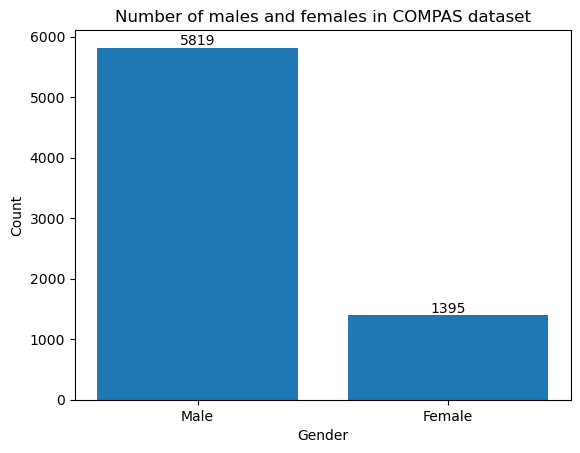

In [17]:
# Get the count of males and females
male_count = len(df[df["sex"] == "Male"])
female_count = len(df[df["sex"] == "Female"])

# Create a bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(["Male", "Female"], [male_count, female_count])
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Number of males and females in COMPAS dataset")

# Assign the counts as text labels to the bars
for i, v in enumerate([male_count, female_count]):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

In [18]:
bins = {"Low": 1, "Medium": 2, "High": 3}
df["score_text_binned"] = df["score_text"].map(bins)

# Print the first 10 rows of the new DataFrame
print(df[["score_text", "score_text_binned"]].head(10))

  score_text  score_text_binned
0        Low                  1
1        Low                  1
2        Low                  1
3       High                  3
4        Low                  1
5        Low                  1
6     Medium                  2
7        Low                  1
8        Low                  1
9        Low                  1


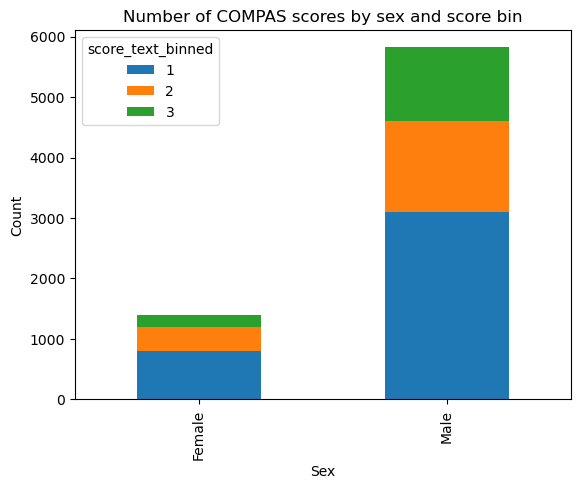

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



# Group the data by sex and score_text_binned
grouped = df.groupby(["sex", "score_text_binned"]).size().unstack()

# Create a stacked bar chart
ax = grouped.plot(kind="bar", stacked=True)

# Set the x and y axis labels and the title
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Number of COMPAS scores by sex and score bin")

# Show the plot
plt.show()


In [20]:
from scipy.stats import chi2_contingency



# Create a contingency table of sex and score_text_binned
contingency_table = pd.crosstab(df['sex'], df['score_text_binned'])

# Perform chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic, p-value, and degrees of freedom
print(f"Chi-square test statistic: {chi2:.2f}")
print(f"P-value: {p:.2f}")
print(f"Degrees of freedom: {dof}")

Chi-square test statistic: 37.58
P-value: 0.00
Degrees of freedom: 2


In [21]:
grouped = df.groupby(['sex', 'score_text_binned'])['sex'].count().unstack('score_text_binned')
length_of_all_3=len(df['score_text_binned']==3) 

print(length_of_all_3)
print(190/7214)
print(1213/7214)
print("threshold(adverse impact on female gropup)=",0.02633/0.1681)
print(grouped)


7214
0.02633767673967286
0.16814527308012198
threshold(adverse impact on female gropup)= 0.15663295657346818
score_text_binned     1     2     3
sex                                
Female              804   401   190
Male               3093  1513  1213


In [22]:
df_test_score = pd.read_csv('/kaggle/input/test-score/Book_2.csv')
df_test_score

,Race,English_score,Math_score,Science_score,result
0,American,75,61,67,pass
1,American,77,33,56,fail
2,American,89,48,66,pass
3,American,88,35,67,pass
4,American,95,47,65,pass
5,American,54,42,55,fail
6,American,66,54,55,fail
7,American,66,33,22,fail
8,American,56,65,66,pass
9,American,76,91,51,pass


39 individuals 

In [23]:

from sklearn.linear_model import LogisticRegression


# convert pass/fail values to 1s and 0s
df_test_score['result'] = df_test_score['result'].apply(lambda x: 1 if x == 'pass' else 0)

# create the feature matrix X and target variable y
X = df_test_score[['Math_score', 'English_score', 'Science_score', 'result']]
y = df_test_score['Race']

# fit a logistic regression model
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X, y)

# predict the race based on the input features
arr = [1, 1, 1, 1]

for i in range(99):
    for j in range(3):
        arr[j] += 1
           

        predicted_race = model.predict([arr])

# print the predicted race
        print(predicted_race, "data",arr )
        if arr==[100,100,100,1]:
            print("Testing array with result as fail")
            arr=[1,1,1,0]
            
            for i in range(99):
                for j in range(3):
                    arr[j] += 1
           

                    predicted_race = model.predict([arr])
                    print(predicted_race, "data",arr  )

                    

['African'] data [2, 1, 1, 1]
['African'] data [2, 2, 1, 1]
['African'] data [2, 2, 2, 1]
['African'] data [3, 2, 2, 1]
['African'] data [3, 3, 2, 1]
['African'] data [3, 3, 3, 1]
['African'] data [4, 3, 3, 1]
['African'] data [4, 4, 3, 1]
['African'] data [4, 4, 4, 1]
['African'] data [5, 4, 4, 1]
['African'] data [5, 5, 4, 1]
['African'] data [5, 5, 5, 1]
['African'] data [6, 5, 5, 1]
['African'] data [6, 6, 5, 1]
['African'] data [6, 6, 6, 1]
['African'] data [7, 6, 6, 1]
['African'] data [7, 7, 6, 1]
['African'] data [7, 7, 7, 1]
['African'] data [8, 7, 7, 1]
['African'] data [8, 8, 7, 1]
['African'] data [8, 8, 8, 1]
['African'] data [9, 8, 8, 1]
['African'] data [9, 9, 8, 1]
['African'] data [9, 9, 9, 1]
['African'] data [10, 9, 9, 1]
['African'] data [10, 10, 9, 1]
['African'] data [10, 10, 10, 1]
['African'] data [11, 10, 10, 1]
['African'] data [11, 11, 10, 1]
['African'] data [11, 11, 11, 1]
['African'] data [12, 11, 11, 1]
['African'] data [12, 12, 11, 1]
['African'] data [1

# I applied all possible outcomes of test scores and results, which shows that If its fail and has low marks in tests that would be predicted as African. The same can be applied to compas dataset but that would be too expensive, so we can divide the possible outcomes in fragments/ chunks and see the results of bias.



Total American count: 18
American two-year recidivism count: 10


Total American count: 3696
American two-year recidivism count: 1901



In [24]:
1901/3696


0.5143398268398268